In [2]:
import pandas as pd
import matplotlib.pyplot as plt #Para plotear
import math #para la raiz cuadrada
index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
Temperature=[26.4265694,  26.50714934, 27.36772626, 26.9667251,  27.46689732, 26.29023037,
 25.16459071, 24.33611505, 24.31437102, 24.1178522,  23.274177,   22.40270315,
 23.07907892, 21.4678649,  20.84709462, 20.2662481,  19.87245037, 19.50288968,
 19.91926455, 19.25238377]
gb=[]
gb_m=[]
gb_h=[]
gx_1=[]
gx_2=[]
gu_v=[]
for T in Temperature:
        if(T<=13.35 or T>=40.08):
            b=0
        else:
            b=0.00202*T*(T-13.35) * math.sqrt(40.08 - T)   

        if(T<=12.286 or T>=32.461):
            b_h=0
        else:
            b_h=0.001044*T*(T-12.286) * math.sqrt(32.461 - T)

        if(T>=12.4 and T<=26.1):
            b_m=-0.9037+0.0727*T
        elif(T>26.1 and T<=32.5):
            b_m=1
        else:
            b_m=0
        #Según el ajuste
        x_1=0.559
        x_2=0.06
        #if(b_m!=0 and b!=0):
        #    x_1=beta_vh/(b*b_h)
        #    x_2=beta_hv/(b*b_m)
        #else:
        #    x_1=0
        #    x_2=0
        beta_vh=x_1*b*b_h
        beta_hv=x_2*b*b_m
        u_v=(8.692/10000)-((1.590/10000)*T)+((1.116/100000)* (T**2)) - ((3.408/10000000)*(T**3)) + ((3.809/1000000000)*(T**4))
        #print("b:",b,", b_h:",", b_m:",b_m,", beta_vh:",beta_vh,", beta_hv:",beta_hv,", u_v:",u_v)
        gb.append(b)
        gb_h.append(b_h)
        gb_m.append(b_m)
        gx_1.append(x_1)
        gx_2.append(x_2)
        gu_v.append(u_v)
        data_tuples = list(zip(Temperature,gb,gb_h,gb_m,gx_1,gx_2,gu_v))
        Tabla = pd.DataFrame(data_tuples, columns =['Temperatura','$b$','$b_h$','$b_m$','$beta_vh$','$beta_hv$','$u_v$']) 
#print(len(gb))

In [3]:
Tabla

,Temperatura,$b$,$b_h$,$b_m$,$beta_vh$,$beta_hv$,$u_v$
0,26.426569,2.579330,0.958355,1.000000,0.559,0.06,0.000029
1,26.507149,2.595444,0.960278,1.000000,0.559,0.06,0.000029
2,27.367726,2.762990,0.972498,1.000000,0.559,0.06,0.000028
3,26.966725,2.686011,0.968794,1.000000,0.559,0.06,0.000028
4,27.466897,2.781706,0.972828,1.000000,0.559,0.06,0.000027
5,26.290230,2.551915,0.954825,1.000000,0.559,0.06,0.000029
6,25.164591,2.319410,0.913931,0.925766,0.559,0.06,0.000032
7,24.336115,2.142904,0.872673,0.865536,0.559,0.06,0.000033
8,24.314371,2.138227,0.871484,0.863955,0.559,0.06,0.000033
9,24.117852,2.095872,0.860512,0.849668,0.559,0.06,0.000034


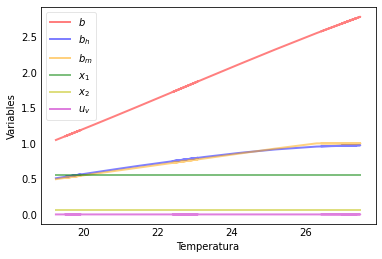

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(t, Iv/N_v, 'orange', alpha=0.5, lw=2, label='Infectados Vector')
#ax.plot(t, Sv/N_v, 'cyan', alpha=0.5, lw=2, label='Susceptible Vector ')
#ax.plot(t, Sh, 'b', alpha=0.5, lw=2, label='Susceptible Host')
ax.plot(Temperature, gb, 'r', alpha=0.5, lw=2, label='$b$')
ax.plot(Temperature, gb_h, 'b', alpha=0.5, lw=2, label='$b_h$')
ax.plot(Temperature, gb_m, 'orange', alpha=0.5, lw=2, label='$b_m$')
ax.plot(Temperature, gx_1, 'g', alpha=0.5, lw=2, label='$x_1$')
ax.plot(Temperature, gx_2, 'y', alpha=0.5, lw=2, label='$x_2$')
ax.plot(Temperature, gu_v, 'm', alpha=0.5, lw=2, label='$u_v$')
#ax.plot(t, Rh, 'g', alpha=0.5, lw=2, label='Recuperados Host ')
#ax.plot(t, datos, 'black', alpha=0.5, marker='o', label='Observados COMAS ')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Variables')
#ax.set_ylim(0,2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
#for spine in ('top', 'right', 'bottom', 'left'):
#    ax.spines[spine].set_visible(False)
plt.show()


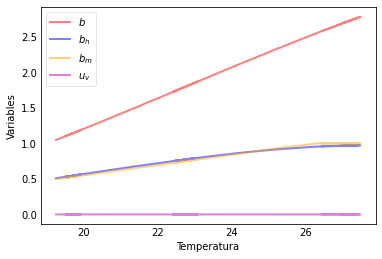

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(t, Iv/N_v, 'orange', alpha=0.5, lw=2, label='Infectados Vector')
#ax.plot(t, Sv/N_v, 'cyan', alpha=0.5, lw=2, label='Susceptible Vector ')
#ax.plot(t, Sh, 'b', alpha=0.5, lw=2, label='Susceptible Host')
ax.plot(Temperature, gb, 'r', alpha=0.5, lw=2, label='$b$')
ax.plot(Temperature, gb_h, 'b', alpha=0.5, lw=2, label='$b_h$')
ax.plot(Temperature, gb_m, 'orange', alpha=0.5, lw=2, label='$b_m$')
ax.plot(Temperature, gu_v, 'm', alpha=0.5, lw=2, label='$u_v$')
#ax.plot(t, Rh, 'g', alpha=0.5, lw=2, label='Recuperados Host ')
#ax.plot(t, datos, 'black', alpha=0.5, marker='o', label='Observados COMAS ')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Variables')
#ax.set_ylim(0,2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
#for spine in ('top', 'right', 'bottom', 'left'):
#    ax.spines[spine].set_visible(False)
plt.show()

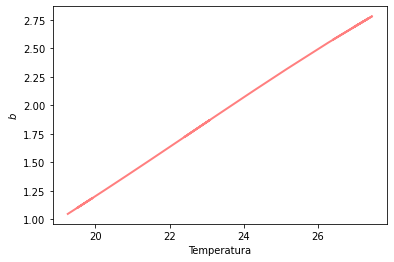

In [6]:
plt.plot(Temperature, gb, 'r', alpha=0.5, lw=2, label='$b$')
plt.xlabel("Temperatura")
plt.ylabel("$b$")
plt.show()

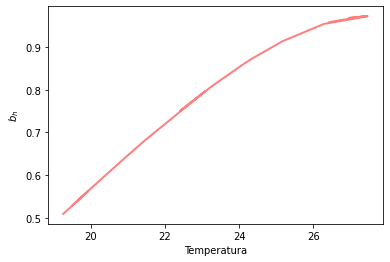

In [7]:
plt.plot(Temperature, gb_h, 'r', alpha=0.5, lw=2, label='$b_h$')
plt.xlabel("Temperatura")
plt.ylabel("$b_h$")
plt.show()

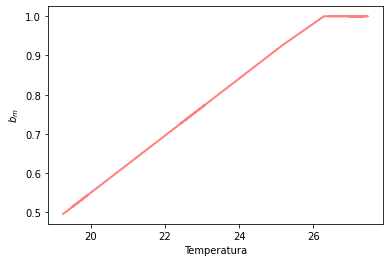

In [8]:
plt.plot(Temperature, gb_m, 'r', alpha=0.5, lw=2, label='$b_m$')
plt.xlabel("Temperatura")
plt.ylabel("$b_m$")
plt.show()

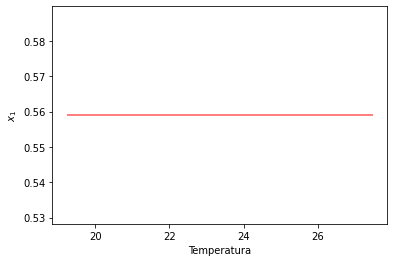

In [9]:
plt.plot(Temperature, gx_1, 'r', alpha=0.5, lw=2, label='$x_1$')
plt.xlabel("Temperatura")
plt.ylabel("$x_1$")
plt.show()

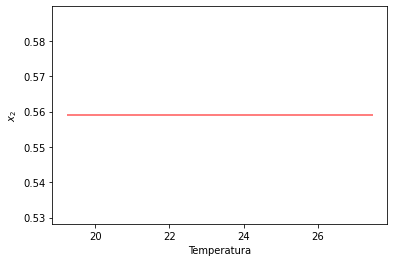

In [10]:
plt.plot(Temperature, gx_1, 'r', alpha=0.5, lw=2, label='$x_2$')
plt.xlabel("Temperatura")
plt.ylabel("$x_2$")
plt.show()

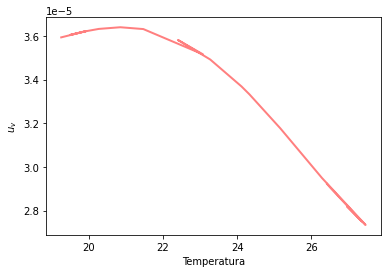

In [11]:
plt.plot(Temperature, gu_v, 'r', alpha=0.5, lw=2, label='$u_v$')
plt.xlabel("Temperatura")
plt.ylabel("$u_v$")
plt.show()